# Motivação e Objetivo

O Transtorno do Espectro Autista é um transtorno neurodesenvolvimental que afeta principalmente a comunicação e o comportamento social. Embora seja diagnosticado geralmente na infância, o diagnóstico tardio ou a falta de diagnóstico pode levar a cuidados inadequados e à marginalização do indivíduo.

A motivação do projeto é, a partir do desenvolvimento de um modelo de aprendizado de máquina baseado nos resultados do questionário AQ-10 e outras informações demográficas, ajudar na identificação e no diagnóstico de TEA em adultos, proporcionando suporte a profissionais de saúde. Nosso objetivo principal é identificar o quanto cada uma das perguntas do questionário impacta no futuro diagnóstico (ou auxência dele).

Para visualizar o questionário AQ-10 [acesse aqui](https://github.com/carinalanchine/machine-learning-saude/blob/main/Projeto%20de%20aplica%C3%A7%C3%A3o/AQ10.pdf).

# Descrição do Dataset

O dataset foi extraído do Autism Diagnosis Challenge no Kaggle e contém informações detalhadas sobre participantes que foram avaliados usando o questionário AQ-10.

Os dados incluem alguns dados pessoais dos participantes, as respostas de cada um para as perguntas do    AQ-10, e a pontuação total no AQ-10, além de uma coluna indicando se o indivíduo foi diagnosticado formalmente com autismo ou não.

O dataset inclui 704 amostras, com variáveis tanto categóricas quanto numéricas.

[Fonte do dataset](https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults/data).

### Adicionando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

### Importando os dados

In [2]:
dataset = pd.read_csv('./autism_screening.csv')
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


### Fazendo uma análise inicial do dataset

In [3]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### Removendo e renomeando colunas conforme necessário

In [4]:
dataset = dataset.drop(columns =['ethnicity', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'result'])
dataset = dataset.rename(columns={'austim': 'autism_history',  'Class/ASD': 'autism', 'A1_Score': 'A01', 'A2_Score': 'A02', 'A3_Score': 'A03', 'A4_Score': 'A04', 'A5_Score': 'A05', 'A6_Score': 'A06', 'A7_Score': 'A07', 'A8_Score': 'A08', 'A9_Score': 'A09', 'A10_Score': 'A10', })
dataset.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,age,gender,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,NO


### Analisando os valores únicos de cada coluna

In [5]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A01: [1 0]
A02: [1 0]
A03: [1 0]
A04: [1 0]
A05: [0 1]
A06: [0 1]
A07: [1 0]
A08: [1 0]
A09: [0 1]
A10: [0 1]
age: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


### Removendo colunas com NaN e analisando os novos dados

In [6]:
dataset = dataset.replace(383., np.nan)
dataset = dataset.dropna()

for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A01: [1 0]
A02: [1 0]
A03: [1 0]
A04: [1 0]
A05: [0 1]
A06: [0 1]
A07: [1 0]
A08: [1 0]
A09: [0 1]
A10: [0 1]
age: [26. 24. 27. 35. 40. 36. 17. 64. 29. 33. 18. 31. 30. 34. 38. 42. 43. 48.
 37. 55. 50. 53. 20. 28. 21. 47. 32. 44. 19. 58. 45. 22. 39. 25. 23. 54.
 60. 41. 46. 56. 61. 59. 52. 49. 51.]
gender: ['f' 'm']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


### Analisando o tipo dos dados

In [7]:
print(dataset.dtypes)

A01                 int64
A02                 int64
A03                 int64
A04                 int64
A05                 int64
A06                 int64
A07                 int64
A08                 int64
A09                 int64
A10                 int64
age               float64
gender             object
jundice            object
autism_history     object
autism             object
dtype: object


### Convertendo float64 para int64

In [8]:
dataset['age'] = dataset['age'].astype('int64')
print(dataset.dtypes)

A01                int64
A02                int64
A03                int64
A04                int64
A05                int64
A06                int64
A07                int64
A08                int64
A09                int64
A10                int64
age                int64
gender            object
jundice           object
autism_history    object
autism            object
dtype: object


### Fazendo label encoding nas colunas

In [9]:
label_encoder = LabelEncoder()
dataset[['autism', 'autism_history', 'gender', 'jundice']] = dataset[['autism', 'autism_history', 'gender', 'jundice']].apply(label_encoder.fit_transform)
dataset = dataset.rename(columns={'gender': 'gender_m'})
dataset.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,age,gender_m,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0


### Tratamento dos dados (X)

In [10]:
X = dataset.drop(columns=['autism'])
X.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,age,gender_m,jundice,autism_history
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0


### Tratamento da classe (y)

In [11]:
y = dataset['autism']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: autism, dtype: int64

In [ ]:
# Balanceamento dos dados
print(y.value_counts())

autism
0    512
1    189
Name: count, dtype: int64


In [13]:
# Fazendo undersampling
undersampler = RandomUnderSampler(random_state=42)
(X,y) = undersampler.fit_resample(X,y)
contagem = y.value_counts()
print(contagem)

autism
0    189
1    189
Name: count, dtype: int64


### Dividindo os dados em conjuntos de treinamento e teste 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento dos modelos

### Árvore de Decisão

In [15]:
model = DecisionTreeClassifier(
    criterion="gini",        
    max_depth=10,           
    min_samples_split=5,      
    random_state=30           
)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=30)

In [16]:
y_pred = model.predict(x_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())


Acurácia: 0.8947368421052632

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        62
           1       0.90      0.87      0.88        52

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

Acurácia média na validação cruzada: 0.8731228070175439


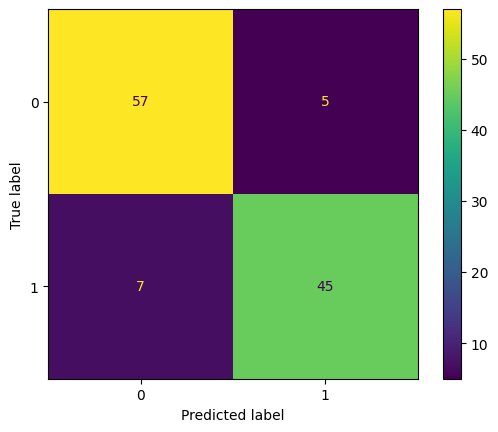

In [17]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

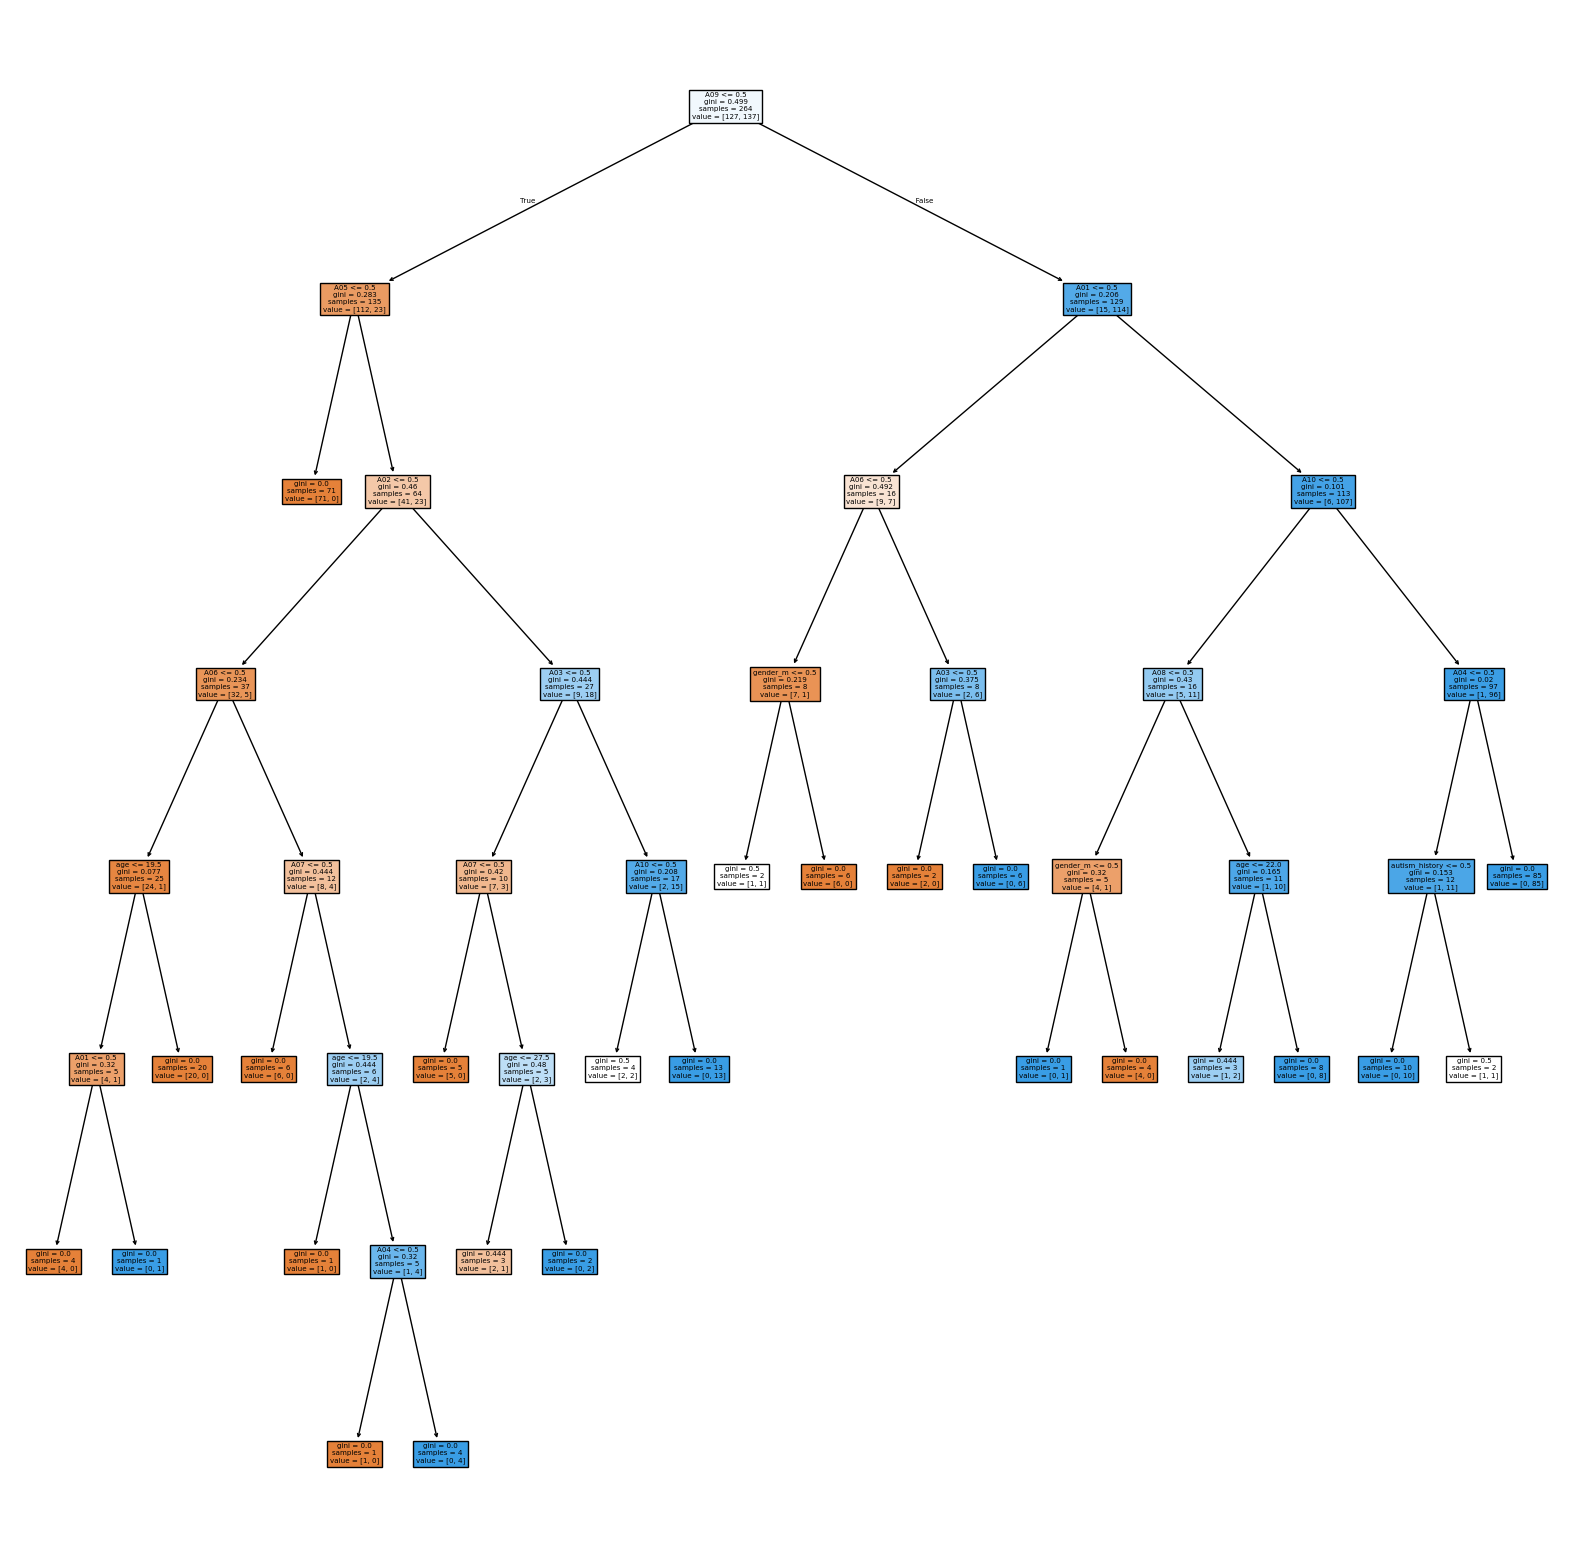

In [18]:
# Árvore
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

### Gradient Boosting

In [19]:
gbmc = GradientBoostingClassifier(
  max_depth=2,
).fit(x_train,y_train)
y_pred = gbmc.predict(x_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

scores = cross_val_score(gbmc, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())


Acurácia: 0.9736842105263158

Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.95      1.00      0.97        52

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

Acurácia média na validação cruzada: 0.960421052631579


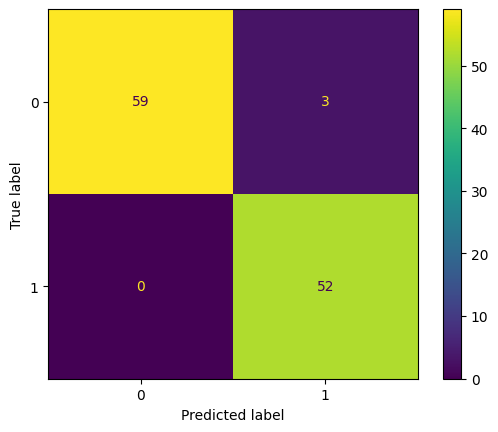

In [20]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

### Random Forest

In [21]:
rf = RandomForestClassifier(
  random_state=42,
  criterion='gini',
  max_depth=10,
)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# Acurácia
print("\nAcurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())


Acurácia: 0.9473684210526315

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        62
           1       0.93      0.96      0.94        52

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Acurácia média na validação cruzada: 0.8731228070175439


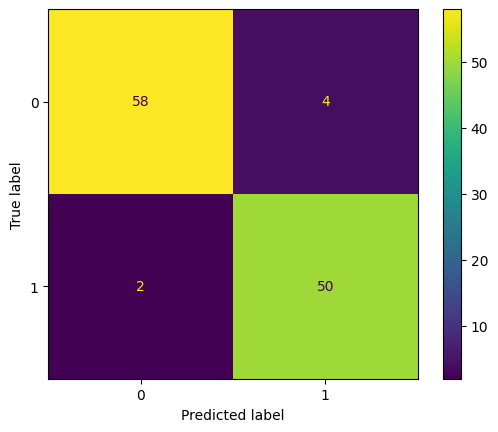

In [22]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

# Classificando os resultados

A01: 0.0780
A02: 0.0550
A03: 0.0458
A04: 0.0358
A05: 0.1222
A06: 0.0932
A07: 0.0160
A08: 0.0280
A09: 0.4838
A10: 0.0291
age: 0.0089
gender_m: 0.0005
jundice: 0.0001
autism_history: 0.0036


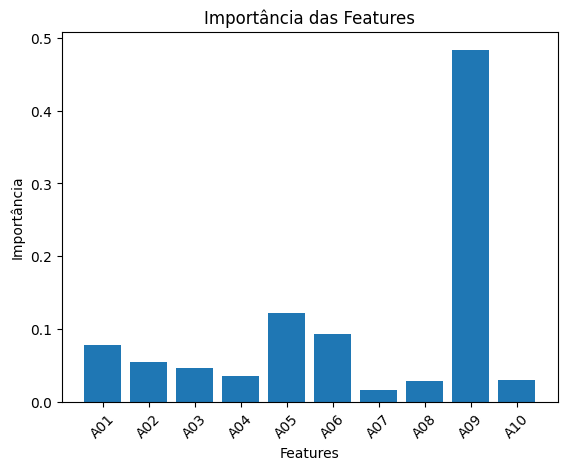

In [23]:
# Definindo quais features mais contribuem para a predição correta
importances = gbmc.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
    
colunas_desejadas = [ 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10' ]

importancias_filtradas = [importances[X.columns.get_loc(col)] for col in colunas_desejadas]

plt.bar(colunas_desejadas, importancias_filtradas)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.xticks(rotation=45)
plt.show()

A01               0.399206
A02               0.386438
A03               0.492606
A04               0.540049
A05               0.610433
A06               0.592939
A07               0.396848
A08               0.289681
A09               0.700071
A10               0.466727
age               0.143774
gender_m         -0.084657
jundice           0.055132
autism_history    0.155191
dtype: float64


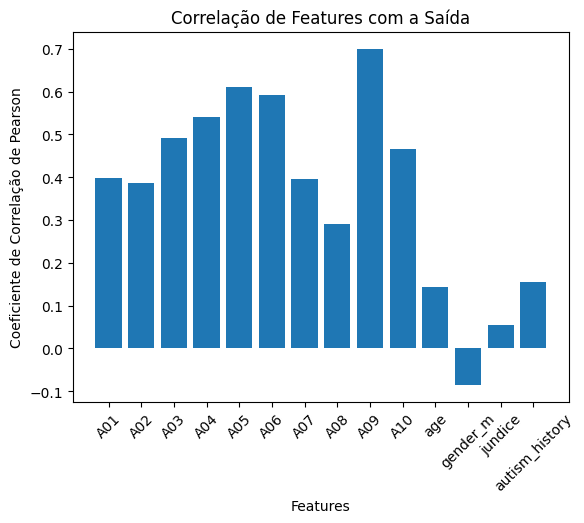

In [24]:
# Coeficiente de correlação de Pearson
correlacoes = X.corrwith(y)
print(correlacoes)

# Plotando o gráfico de barras
plt.bar(correlacoes.index, correlacoes.values)
plt.xlabel('Features')
plt.ylabel('Coeficiente de Correlação de Pearson')
plt.title('Correlação de Features com a Saída')
plt.xticks(rotation=45)
plt.show()

# Conclusão

De acordo com os gráficos gerados, podemos classificar as perguntas de acordo seu impacto no diagnóstico de TEA:
1. Pergunta número 09
2. Pergunta número 05
3. Pergunta número 06
4. Pergunta número 04
5. Pergunta número 03
6. Pergunta número 10
7. Pergunta número 01
8. Pergunta número 07
9. Pergunta número 02
10. Pergunta número 08